Notebook is copyright &copy; of [Ajay Tech](https://ajaytech.co). 

# [Regression](https://ajaytech.co/regression-in-python)

> <b>Summary</b> : Regression is a basic Machine Learning Technique. We will be learning Simple Linear Regression, Multiple Linear Regression and Polynomial Regression in this section. On top of the basic technique itself, we will also be covering many statistical concepts (like _Null Hypothesis_, _p-value_, _r-<sup>2</sup>_, _RMSE_ ) and other key concepts in machine learning like _Feature Selection_, _Training and Test data splits_ that will be useful in evaluating models going forward as well. 

## Contents

- [What is Regression](#What-is-Regression)
- [Why Regression](#Why-Regression)
- [Solve a Regression problem in Python](#Solve-Regression-in-Python)
- [Simple Linear Regression](#Simple-Linear-Regression)
  - [How did we get the straight line ( fit )](#How-did-LinearRegression-fit-the-straight-line)
  - [Residuals](#Residuals)
  - [Sum of Squares](#Sum-of-Squares)
- [Multilinear Regression](#Multilinear-Regression)
  - [Boston Housing dataset](#Boston-Housing-dataset)
  - [Reponse Variable vs Predictor](#Response-Variable-vs-Predictor)
- [Correlation](#Correlation)
- [p value](#p-value)
  - [Null Hypothesis](#Null-Hypothesis)
  - [Optimum p-value](#Optimum-p-value)
- [Key Parameters](#Key-Parameters)
  - [r-squared - r2](#r-squared-r2)
    - [How is r2 calculated](#How-is-r2-calculated)
  - [r-squared adjusted](#r-squared-adjusted)
  - [RMSE - Root Mean Square error](#RMSE-Root-Mean-Square-error )
- [Feature Selection](#Feature-Selection)
  - [Stepwise Regression](#Stepwise-Regression)
    - [Backward Elimination](#Backward-Elimination)
- [Accuracy of the model](#Accuracy-of-the-model)
  - [Training & Test datasets](#Training-and-Test-datasets)
- [Polynomial Regression](#Polynomial-Regression)
- [Overfitting](#Overfitting)
  - [Detect Overfitting](#Detect-Overfitting)
  - [Prevent Overfitting](#Prevent-Overfitting)
- [Challenges](#Challenges)


### What is Regression

In Machine Learning, most problems are classified as supervised vs unsupervised learning. We will first focus on supervised learning algorithms and later work on unsupervised learning algorithms. Supervised learning is once again split into the following 2 groups
- Classification
- Regression

Given a particular height and weight, classify the person as either male or female. This is an example of classification. You are essentially trying to **classify** the person - in this case - as male or female based on certain characteristics.

In contrast, say you are trying to predict the body fat percentage based on height and weight - this is an example of a regression problem. What is the difference ? Body Fat % is a continuous variable - say it starts at a minimum of 2% (really lean) and can go all the way up to 50 % say (extremely obese) - as opposed to a categorical variable in the example above ( Male or Female ).

### Why Regression

If you are learning how to solve a regression problem for the first time, you probably need to understand why you need regression to start with. This is probably the simplest of the regression problems. Let's start with a simple data set - Swedish auto insurance claims. You can google it or get it from [kaggle](https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset). It is a very small data set with just 2 variables -
- Number of Claims
- Total payment for these claims ( in thousands )

<img src="./pics/swedish_auto_claims.png"/>

Claims come first and the settlement happens much later. Assuming these are claims this company receives per week, is there a way we can predict how much the company will end up paying, just based on the number of claims ?

**What value does this bring to the company ?**

Being able to predict the payment based on the number of claims gives a very good understanding of the companies expenses very much in advance.

**Why do you need machine learning for this problem ?**

Each claims is different - A fender bender claims costs a thousand dollars and a total could cost 20 grand. The type of claim does make for a good predictor, but let's just assume we don't have that at this point. Even if we had the type of claim, a fender bender can cost anywhere from 300 to 2000 dollars based on the severity of damage, the arbitration and several environmental factors. Essentially, there is no easy way to correlate the claims to the payment. If we tried to do this using some kind of IF, THEN logic, we would be going around in hoops.

### Solve Regression in Python

In [2]:
import pandas as pd

data = pd.read_csv("../data/insurance.csv", skiprows = 6, header = None, names=["claim_count","claim_value"])
data.head()

,claim_count,claim_value
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Looking OK - but since we are reading data from file, we have to ensure that Python is not reading integers as strings or other object types. Let's quickly verify if the data types are correct. 

In [20]:
data.dtypes

claim_count      int64
claim_value    float64
dtype: object

Looking good. Now, onto LinearRegression. Before we do that, we would have to install the Python package - scikit-learn. 

<pre>
> pip install scikit-learn

# or 

> conda install scikit-learn
</pre>

The module that we need to solve Linear Regression is **LinearRegression** from __linear_model__ package.

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [6]:
model.fit(data["claim_count"],data["claim_value"])

ValueError: Expected 2D array, got 1D array instead:
array=[108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
model.fit(data[["claim_count"]],data["claim_value"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Our model is ready. Let's start predicting *claims* based on the *count* of claims. We have used the **fit** method to fit the model - to predict, we will be using the **predict** method. But before we do that, let's plot this out to understand what we have done so far. 

In [8]:
predict = model.predict(data[["claim_count"]])

In [9]:
slope = model.coef_
slope

array([3.41382356])

In [10]:
intercept   = model.intercept_
intercept

19.99448575911478

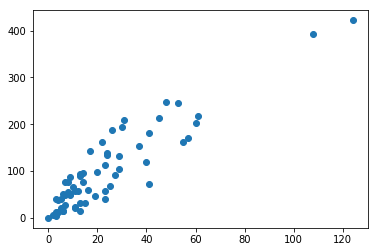

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter( data["claim_count"],data["claim_value"])

Linear Regression has already solve this problem for us - we just didn't realize it yet. The parameters ( also called co-efficients )

- slope
- intercept  

are the solution. 

In [2]:
point_1 = slope*0 + intercept
point_2 = slope*120 + intercept

print ( point_1, point_2)

plt.scatter( data["claim_count"],data["claim_value"])
plt.plot([0,120], [point_1,point_2])

NameError: name 'slope' is not defined

How did we get the straight line ?

<img src="./pics/y_mx_b.png"/>

A straight line can be defined mathematically using

# $ y = ax + b$

where
- a = slope
- b = intercept

These are also called coefficients. The **fit** function of _LinearRegression_ has already arrived at these numbers ( slope and intercept ). It has done so based on the data

In [13]:
slope       = model.coef_
intercept   = model.intercept_

print ( "a (slope)     = ",slope)
print ( "b (intercept) = ", intercept)

a (slope)     =  [3.41382356]
b (intercept) =  19.99448575911478


#### What did we achieve ?

What we have essentially done is predicted a relationship between the number of claims and the total amount paid. For example, what is the total amount expected to be paid when the number of claims is 80 ?

<img src="./pics/predict_claims_value.png"/>

Easy, right ?

#### Prediction

We don't have to draw lines like this every time to predict the value of Y for a value of X. You can use the **predict ( )** function.

In [14]:
claim_values = model.predict (data[["claim_count"]])

or more specifically, 

In [15]:
claim_values = model.predict (pd.DataFrame([10,20,30,40,60]))

In [16]:
claim_values

array([ 54.13272136,  88.27095696, 122.40919256, 156.54742816,
       224.82389936])

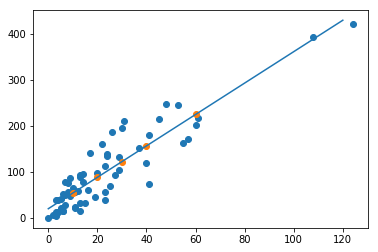

In [17]:
plt.scatter( data["claim_count"],data["claim_value"])
plt.plot([0,120], [point_1,point_2])

plt.scatter([10,20,30,40,60], claim_values , marker='o')

What were the original values though ? You can pick them up from the CSV. 

<img src="./pics/insurance_claims_actual_values.png"/>

In [18]:
original_claim_values = [65.3,98.1,194.5,119.4,202.4]

Let's also plot these to compare how well we predicted.

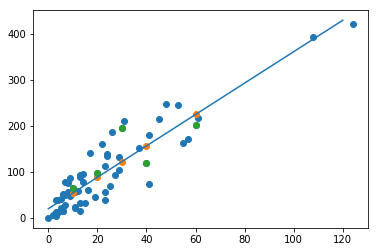

In [19]:
plt.scatter( data["claim_count"],data["claim_value"])
plt.plot([0,120], [point_1,point_2])

plt.scatter([10,20,30,40,60], claim_values , marker='o')
plt.scatter([10,20,30,40,60], original_claim_values , marker='o')


Some values are pretty close, some are a bit off - but nevertheless its a good prediction for the amount of time we spent doing it. 

## Simple Linear Regression 

What we have seen so far is an example of implementing **Simple Linear Regression** in Python. What we will see in this section is the math behind it - Give it a try - if it gets tedious, please do a couple of re-reads. It is critical that you understand this section. 

### How did LinearRegression fit the straight line

The fun starts now. How did the **LinearRegression ( )** function fit the straight line ? How did it it arrive at this equation

# $ y = 3.4 x + 19.99$

Obviously, there is no one straight line that will pass through all the points in this case.

<img src="./pics/best_fit.png"/>

If you take these 4 data points, we can eyeball a straight line that goes through the middle of it. The ones marked with question marks are visually not a good fit at all. But the question that linear model tries to solve is,

> What is the **"Optimum"** straight line that best describes the relationship between X and Y

This is where statistics comes in.

#### Let's zoom in

Let's simplify and make up some numbers ( for easy calculation) of claims vs payments. Say we have a set of 5 data points for claims vs payments and we wish to fit a linear model that can predict further data. This is a very small data set to do anything practical, but there is a reason why we are doing such a small data set as we will see in the coming sections.

<img src="./pics/claism_data.png"/>

Let's plot these on a graph.

<img src="./pics/claims_vs_payments.jpg"/>

If we were asked to eyeball a straight line that best fits these data points, this is how we would do it.

<img src="./pics/approximate_line.png"/>

How did we do it ? Our eye is essentially trying to **minimize the distances** from each of these points to the straight line. The best fitting straight line is one which minimizes the distances for all these points.

Linear regression in machine learning does exactly that - Instead of a human eye, machine learning takes the help of statistics to do this approximation. There are a couple of methods to do this in statistics.

- Ordinary Least Squares
- Gradient Descent

Let's explore the first method here.

#### Residuals

When we tried to minimize the distance of each of these points from the line we are trying to fit, the distances between the points and the straight line ( on the y axis ) are called **residuals**.

<img src="./pics/residuals.png"/>

#### Sum of Squares

**Warning - Geeky Statistics stuff**

To arrive at the best fit values for the straight line, statisticians have arrived at the following formula based on the method of least squares. How they arrived at it is pretty geeky and let's leave that to the statisticians.

<img src="./pics/equation.png"/>

This equation sounds scary, but it is not. I am going to prove it to you in a minute down below. There are 2 things in this equation that require an explanation.

- The weird symbol that looks like a knocked up W . It is used for summation.
- y with a bar on it ( or x with a bar ). The bar just represents the average. So y with a bar on it represents the average.

Let's take the same numbers that we have above and try to calculate the formula by hand. Excel would make things easy, but let's just do it manually, since the numbers are not all that bad.

<img src="./pics/b_calculation.png"/>

That was huge - Now we can easily calculate a and b from the Y = a + b X equation.

**Validation**

Let's cross validate this equation.

In [3]:
sample = pd.DataFrame( {'x' : [20,40,60,80,100],'y':[40,60,80,80,90]})

In [6]:
sample

,x,y
0,20,40
1,40,60
2,60,80
3,80,80
4,100,90


Let's model this data and plot it

In [25]:
model.fit(sample[["x"]],sample["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

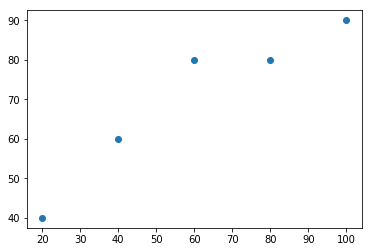

In [30]:
plt.scatter( sample["x"],sample["y"])

Now, let's use our model to visualize the fit

In [31]:
slope       = model.coef_
intercept   = model.intercept_

print ( "a (slope)     = ",slope)
print ( "b (intercept) = ", intercept)

a (slope)     =  [0.6]
b (intercept) =  34.0


These are the slope and intercept values. We can now use these to plot the fit line.

[34.] [106.]


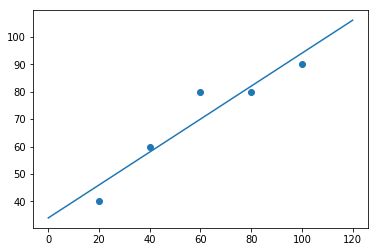

In [32]:
point_1 = slope*0 + intercept
point_2 = slope*120 + intercept

print ( point_1, point_2)

plt.scatter( sample["x"],sample["y"])
plt.plot([0,120], [point_1,point_2])

The model object has a whole host of other information that you can use to predict how good of a fit the line is to the data. But first, let's predict the value in a table.

In [19]:
pred_y = model.predict (sample[["x"]])
pred_y

array([46., 58., 70., 82., 94.])

The differences ( residuals ) are highlighted below. 

<img src="./pics/residuals_visualized.png"/>

There are so many other parameters ( like the **p-value**, **r-squared**, **r-squared adjusted** ) and graphs ( **Residuals vs fitted** , **Q-Q Plot** etc ) that are used to analyze the performance of a model fit. We are going to get to that in the next section. To set the stage for these parameters, let's scale up our data set.

## Multilinear Regression

So far we have seen one predictor and one response variable. This is also called **simple** linear regression. Ofcoure, real world is not that simple, right ? There can be multiple predictors. We are going to look at one such example in a classic example - Boston Housing dataset. 

It has 13 predictors and 1 response variable. So, the equation for that mathematically would be 

# $ y = a_1 x_1 + a_2 x_2 + .. + a_n x_n + b$

the value of n would be 13 in this case. Let's look at the dataset below. 

### Boston Housing dataset

Predicting the price of a house is based on many parameters like the size, neighborhood, crime rate, pollution etc. Essentially, there is no mathematical equation that can predict the price of a house based on these parameters - that's essentially where ML comes into the picture.

In the earlier example, we just had to predict the value of **Y** given a value of __X__. There is just 1 predictor ( X ). However, let's have a look at the Boston Housing data set - tons of variables. Load the data first.



There are a couple of ways to load the data.

- Download it from <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/">UCI ML repository</a>
- Download it from this website
- Load it straight from scikit-learn library

#### Download and load from file system

In [8]:
import pandas as pd
import numpy as np

boston_housing = pd.read_csv("../../data/boston_housing.csv")
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The attribute names are a bit cryptic. So, here are the descriptions. 

- **CRIM**      per capita crime rate by town
- **ZN**        proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**     proportion of non-retail business acres per town
- **CHAS**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**       nitric oxides concentration (parts per 10 million)
- **RM**        average number of rooms per dwelling
- **AGE**       proportion of owner-occupied units built prior to 1940
- **DIS**       weighted distances to five Boston employment centres
- **RAD**       index of accessibility to radial highways
- **TAX**       full-value property-tax rate per USD - 10,000
- **PTRATIO**  pupil-teacher ratio by town
- **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**    % lower status of the population
- **MEDV**     Median value of owner-occupied homes in USD 1000's

#### Load it directly from scikit learn module

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

**bunch** is a scikit learn object used for loading in-built data packages - like Boston Housing or Iris. To view the data, just do

In [9]:
np.set_printoptions(precision=3, suppress=True, linewidth=150)

# Show just the top 10 rows in the dataset
boston.data[1:10,:]

array([[  0.027,   0.   ,   7.07 ,   0.   ,   0.469,   6.421,  78.9  ,   4.967,   2.   , 242.   ,  17.8  , 396.9  ,   9.14 ],
       [  0.027,   0.   ,   7.07 ,   0.   ,   0.469,   7.185,  61.1  ,   4.967,   2.   , 242.   ,  17.8  , 392.83 ,   4.03 ],
       [  0.032,   0.   ,   2.18 ,   0.   ,   0.458,   6.998,  45.8  ,   6.062,   3.   , 222.   ,  18.7  , 394.63 ,   2.94 ],
       [  0.069,   0.   ,   2.18 ,   0.   ,   0.458,   7.147,  54.2  ,   6.062,   3.   , 222.   ,  18.7  , 396.9  ,   5.33 ],
       [  0.03 ,   0.   ,   2.18 ,   0.   ,   0.458,   6.43 ,  58.7  ,   6.062,   3.   , 222.   ,  18.7  , 394.12 ,   5.21 ],
       [  0.088,  12.5  ,   7.87 ,   0.   ,   0.524,   6.012,  66.6  ,   5.561,   5.   , 311.   ,  15.2  , 395.6  ,  12.43 ],
       [  0.145,  12.5  ,   7.87 ,   0.   ,   0.524,   6.172,  96.1  ,   5.95 ,   5.   , 311.   ,  15.2  , 396.9  ,  19.15 ],
       [  0.211,  12.5  ,   7.87 ,   0.   ,   0.524,   5.631, 100.   ,   6.082,   5.   , 311.   ,  15.2  , 386.63 ,  2

Since all of the data is numeric in nature, it is set up as a NumPy object. What else is available ? The Bunch object is more or less like a dictionary. so, you can use the **keys ( )** method to get all the keys. 

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Now, let's see the features

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

How large is the dataset ? 

In [10]:
boston.data.shape

(506, 13)

so, it is 506 rows and 13 columns. 

And here is the description of what these columns represent. 

In [14]:
print ( boston.DESCR )
# The reason why we are doing print is because the DESCR value is a formatted string ( with new line characters like \n etc)
# otherwise, you get unformatted text

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

If you observe closely, the actual price column ( MEDV ) that you see in the loaded file ( from pandas.read_csv() ) previously is missing in the scikit learn data. That is because it is available as a separate key in the scikit learn Bunch called **target**. Let's see that as well. 

Looking back at our equation, 

# $ y = a_1 x_1 + a_2 x_2 + .. + a_n x_n + b$

- $x_1$ = CRIM - per capita crime rate by town
- $x_2$ = ZN   - proportion of residential land zoned for lots over 25,000 sq.ft.
- ..
- $x_13$ = LSTAT - % lower status of the population

In [5]:
# Just show the top 10 target values
boston.target[1:10]

array([21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Let's create a Pandas dataframe from this data as well for further analysis. 

In [2]:
boston_housing = pd.DataFrame(boston.data)

# set the columns
boston_housing.columns = boston.feature_names

# add the price
boston_housing["MEDV"] = boston.target

# now, look at the head
boston_housing.head()

NameError: name 'pd' is not defined

Alright, now that we know how to get the dataframe ( via file upload or scikit learn library itself ), let's quickly do a linear regression on this data. 

#### Response Variable vs Predictor

What is the problem we are trying to solve ? We are actually trying to predict the Median house price based on a variety of parameters - like Crime rate, Nitric Oxide content in the air, age of the house etc. Each of these parameters have a "say" in the price of the house. The target variable is valled the **Response Variable** and the parameters that have a "say" in determining the target variable are called the **Predictors**.

In our case, there are 12 predictors ( CRIM, ZN, INDUS...LSTAT) and 1 response variable ( MEDV ). Just for simplicity sake, let's just pick one parameter - **rm** - the number of rooms in the house. Let's see how well we predict the price of the house based on just this one parameter.

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit( boston_housing[["RM"]], boston_housing["MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's plot our prediction. 

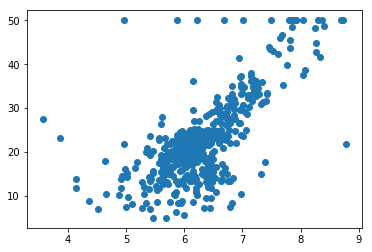

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(boston_housing["RM"], boston_housing["MEDV"])

Now, let's draw the straight line that our model has predicted. The maximum number of rooms in our data is 9 and the minimum is 0. so, let's determine the co-ordinates to draw our fit line. 

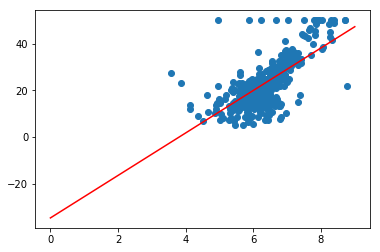

In [21]:
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*9 + intercept

plt.scatter(boston_housing["RM"], boston_housing["MEDV"])
plt.plot([0,9], [point_1,point_2],color="r")

Looks like a decent enough fit. Let's do another - **lstat** - lower status population percentage. 

**Step 1 - Model the data**

In [31]:
model.fit( boston_housing[["LSTAT"]], boston_housing["MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Step 2 - Determine the slope and intercept from the model**

In [32]:
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*9 + intercept

__Step 3 - Plot the data and fit line__

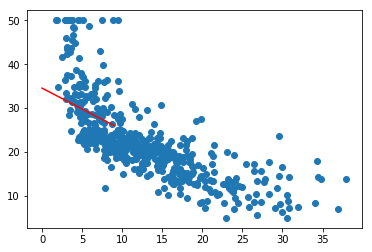

In [33]:
plt.scatter(boston_housing["LSTAT"], boston_housing["MEDV"])
plt.plot([0,9], [point_1,point_2],color="r")

The line seems off, right ? Why is that ? How did we determine the points ? (Based on the older data - number of rooms). The range of data for LSTAT on the other hand starts at 0 and ends at 40. So, lets re-determine the line. 

In [34]:
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*40 + intercept

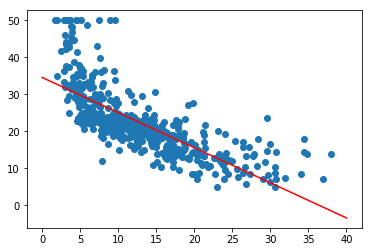

In [35]:
plt.scatter(boston_housing["LSTAT"], boston_housing["MEDV"])
plt.plot([0,40], [point_1,point_2],color="r")

This seems accurate enough. However, if you look at both these graphs, the relationship between the predictors and response variable seems a bit different between the predictor LSTAT vs RM. Let's put these graphs side by side to understand better. 

<img src="./pics/lstat_medv.png" style="background-color:white"/><img src="./pics/rm_medv.png" style="background-color:white"/>

The first picture is lstat vs medv and the second is rm vs medv. 

<img src="./pics/lstat_rm_medv.png"/>

Also, not all variables might be relevant ( irrespective of the direction, decrease or increase ). Let's take the parameter dis - distance to employment. Once again, if we try to fit this using our steps

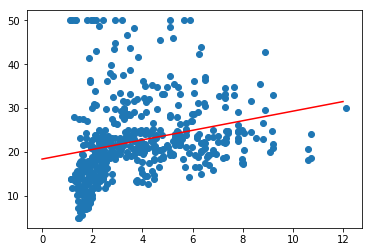

In [42]:
# step 1
model.fit( boston_housing[["DIS"]], boston_housing["MEDV"])

# step 2
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*12 + intercept

# step 3
plt.scatter(boston_housing["DIS"], boston_housing["MEDV"])
plt.plot([0,12], [point_1,point_2],color="r")

Visually, there is not much of a linear relationship between distance and median value ( although we tried to fit it ). How exactly do we measure the relationship ?

### Correlation

This is the simplest measure of relation between 2 numeric variables. Luckily, pandas provides a built-in method for calculating correlation - **corr ( )**. For example,

In [43]:
boston_housing["MEDV"].corr(boston_housing["DIS"])

0.24992873408590394

Correlation values are calculated to values between 0 and 1. Technically, the values can vary between -1 and +1. 0 being no correlation and 1 being highly correlated ( -1 also signifies a high correlation, just that it is a negative correlation , meaning if the predictor values increases, the response value decreases). In the example above, the relationship between distance and median value is just 24 %. How about others predictors ?



In [44]:
boston_housing["MEDV"].corr(boston_housing["RM"])

0.6953599470715391

In [45]:
boston_housing["MEDV"].corr(boston_housing["LSTAT"])

-0.7376627261740147

This seems in-line with our plots above right ? 

> Correlation is NOT causation

However strong the correlation is, it does NOT imply causation. This is a bit tricky to understand. For example, look at the picture below.

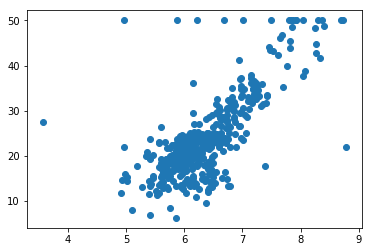

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(boston_housing["rm"],boston_housing["medv"])


There seems to be a significant correlation between the number of rooms ( **rm** ) and the median price value (**medv**). 

<img src="./pics/rm-medv-correlation.png"/>

Now, imagine another column - _Power Consumption_ . As the number of rooms increase, the power consumption also tends to increase. 

<img src="./pics/correlation-power-medv.png"/>

Does it mean that _Power Consumption_ has a strong correlation with the house price ? Very unlikely - isn't it ? Mathematically, **correlation** is just a tool that signifies the level of correlation between 2 variables. However, it is upto us (or the domain expert) to determine if the correlation is real or ficticious. 

### Quiz

**Question** : The higher the correlation, lower the stronger is the relationship between the variables. 

- True
- False

**Question** : Correlation is a measure of how strong the relationship is between two variables.

- True
- False

**Question** : -0.95 represents a strong positive correlation

- True
- False

**Question** : A correlation value of 0 shows that there is a perfect correlation between the variables

- True
- False

**Question** : The picture above shows a strong negative correlation

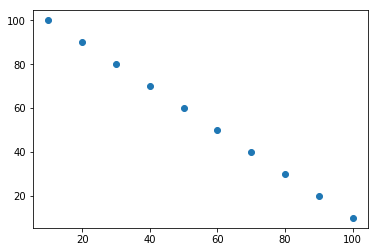

In [24]:
x = [10,20,30,40,50,60,70,80,90,100]
y = [100,90,80,70,60,50,40,30,20,10]

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y)

- True
- False

### p value

Also called probability value, p-value answers the following question -

> **If a predictor is relevant to predict the response and if yes, how relevant is it ?**

We have to understand p-value in the context of Null Hypothesis.



#### Null Hypothesis

Null hypothesis (denoted as **H<sub>0</sub>** assumes that there is no relationship between the predictor and the response variable. For example, if you look at the relationship between the number of rooms ( rm ) and the median price value of the home ( medv ) in the Boston Housing dataset, Null hypothesis says that there is NO relationship between them.



<img src="./pics/rm-medv.png"/>

Well, although we can see a linear relationship visually ( almost ) between those 2 variables, we start off with the Null Hypothesis. It is indicated in statistics as **H<sub>0</sub>** 



Alternate hypothesis indicates that they are related. It is indicated as **H<sub>1</sub>** . P-value indicates how much the observed data is inconsistent with the Null Hypothesis. This is a bit cryptic, right ? Let's explore this further.



Let's just consider 2 random variables that are normally distributed. Since they are random variables, there would be no relationship between them, right ? Let's check it out.



**Dataset 1**

A normal distribution of 100 values with a mean of 100 and sd of 20


In [51]:
import numpy as np

x = np.random.normal(100, 20, 20)
x

array([ 91.64973412, 109.32304767,  93.9077676 , 105.24405572,
       109.95742642, 104.85157705,  79.36556476, 106.15237648,
       134.17386516, 139.82031032,  82.66192429, 100.23685804,
        99.57295153, 127.87697754, 126.32897135,  87.31944582,
        91.30163773, 107.71736601,  72.51234899, 118.62316221])

**Dataset 2**

Another normal distribution of 100 values with a mean of 100 and sd of 20


In [52]:
y = np.random.normal(100, 20, 20)
y

array([115.22858397, 113.51179658,  62.25412103,  81.838377  ,
        94.31343936,  89.45654237, 114.43156241,  98.09960278,
       100.03463311, 113.47463086,  93.06795158,  55.79362936,
        53.21061632, 107.47367928,  87.54403807,  94.9882873 ,
       143.20548377, 112.28885607, 115.2954887 ,  92.15780964])

Let's plot **x** vs __y__ and see how it looks.



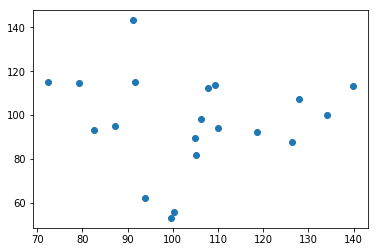

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y)

This almost looks like the night sky, isn't it ? Point being, there is no relationship between **x** and __y__ as they are random variables - That is pretty understandable right ? Let's try to calculate a relationship between these two variables ( although there is none ) and see how it compares against another situation where there IS actually a relationship.



In [54]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Step 1 - Model
model = LinearRegression()

model.fit( pd.DataFrame(x), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

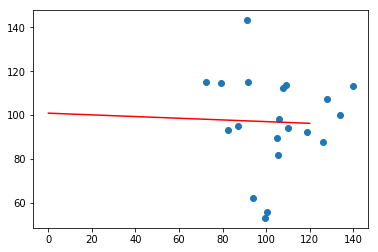

In [55]:
# step 2
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*0 + intercept
point_2 = slope*120 + intercept

# step 3
plt.scatter(x, y)
plt.plot([0,120], [point_1,point_2],color="r")

What is the **p-value** in this case ?



Unfortunately, the standard scikit learn's LinearRegression() object does not provide p-value. There are other libraries that can help us with determining the p-value. For example, let's use the **scipy** library.

In [58]:
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_value

0.8940519006423479

And the **p-value** in this case is 0.89. 

p-value is 0.89 - that's 89 %. p-value is always between 0 and 1. 0.89 is a big number right ? Does it indicate that there is a strong relationship between x and y in this case ? On the contrary, a high p-value indicates that the there is NO relationship between x and y - which is what the Null Hypothesis states.

On the other hand, if we calculate the p-value of the relationship between the number of rooms ("RM") and median price ("MEDV"), then you get a very small value. 

In [61]:
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(boston.data[:,5],boston.target)

In [62]:
p_value

2.4872288710080936e-74

p-value in this case is 2.487 x 10<sup>-74</sup>. That is an extremely low value ( 0.0000..00248 ) . 

> What it means is that there is a 0.0000..00248 % chance that the correlation is random.  

or in other words, there is a 99.99999 % chance that the data does represent a relationship between the two variables. Whereas in the case of the random variales, there is a 89% chance that the correlation is random

### Optimum p-value

A value below which we can safely conclude that the relationship between 2 variables did not happen by chance, but because there is a true causal relationship, is called an optimum p-value.  

> Is there a fixed p-value below which, we can safely conclude a strong relationship (Alternate Hypothesis) ?

Typically p <= 0.05 is accepted in most cases. However, the actual value at which the business is comfortable is based on a variety of parameters like 
- type of data
- level of confidence the business requires etc

## r-squared - r2

R-squared is a measure of the explanatory power of the model - How well are the variables able to explain the response variables using the model. A model's r<sup>2</sup> varies between 0 and 1. Unlike p-value, scikit provides r<sup>2</sup> values ( without having to reply on scipy ).

**Method 1** - Using scipy

In [16]:
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(boston.data[:,5],boston.target)
print ( "r-squared = ",r_value**2)

r-squared =  0.48352545599133373


**Method 2** - Using scikit learn

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston

boston = load_boston()
print ( boston.feature_names)

X = boston.data
y = boston.target.reshape(-1,1)

# Fit model based on RM - Number of rooms
model   = LinearRegression().fit(X[:,[5]],y)

r2_score = model.score(X[:,[5]],y)
print ( "r-squared = ",r2_score)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
r-squared =  0.4835254559913343


In the example above, we tried to model the response variable medv ( median house value ) as a measure of the number of rooms ( rm ) - the r<sup>2</sup> value is 0.4835 . It is a measure of how well the model explains the relationship. A low value of r<sup>2</sup> ( r<sup>2</sup> = 0 ) means that the explanatory variables are not able to predict the response variable well

In [25]:
import numpy as np

x = np.random.normal(100, 20, 20)
y = np.random.normal(100, 20, 20)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ( "r-squared = ",r_value**2)

r-squared =  0.005777921394059681


For example, if you look at the random value example, the r<sup>2</sup> value is 0.00725 - which is very close to 0. What this means is that the explanatory variable (x) is not able to explain the variance in the response variable (y). 

A high value or r<sup>2</sup> ( r<sup>2</sup>= 1 ) means that the explanatory variables are fully able to predict the response - In this case the number of rooms ( rm ) is able to explain the variance in the median house value around 48 %. The remaining 52% variance is unexplained by the explanatory variable. 

## How is r2 calculated

The formula to calculate r<sup>2</sup> is 

<img src="./pics/r2-calculation.png"/>

The denominator **Sum of Squares <sub>total</sub>**   is the worst possible score. The numerator **Sum of Squares <sub>residuals</sub>** is how far the model is performing. So **r <sup>2</sup>** is essentially a normalized score of how well the model is predicting the data - in comparision to the worst possible score.

What do we mean by **worst possible** score ? Well, if we know the weights of each of the individuals in the class, without any indicator of whose that weight is ( just a list of weights ), what is our best possible prediction of weight for anybody in the class ? We just do an arithmetic average - right ? And that's what we use to calculate the **Sum of Squares <sub>total</sub>** . 

Let's calculate r<sup>2</sup> by hand for our simple dataset. 

<img src="./pics/r_squared_for_simple_data.png"/>

Let's verify this in Python.

In [7]:
x = [20,40,60,80,100]
y = [40,60,80,80,90 ]

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ( "r-squared = ",r_value**2)

r-squared =  0.8999999999999999


There you go - our manual calculation verifies with Python's calculation. 

**Exercise** - Calculate the **r<sup>2</sup>** value of of Boston housing dataset for the predictor - NOX ( Level of Nitric Oxide in the air ).

## r-squared adjusted 

Mathematically, r<sup>2</sup> has a peculiar property. Adding more predictors increases the value of r<sup>2</sup> . This is not very intuitive to begin with. Let's try it on our Boston Housing dataset. 

In the example above, we have tried to model medv from rm . So, the only explanatory variable is rm ( number of rooms ). Based on that relationship we have an r<sup>2</sup> value of 0.4835 . What would happen if we add another explanatory variable ? - say lstat ( percentage of lower status of the population ). Unfortunately, scipy's **scipy.stats.linregress** or __sklearn.metrics.r2_score__ cannot deal with more than 1 predictor. For that you need a new library called **statsmodels**. Just install it using pip or conda. 

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston

boston = load_boston()
print ( boston.feature_names)

X = boston.data
y = boston.target.reshape(-1,1)

# Fit model based on RM - Number of rooms
model   = LinearRegression().fit(X[:,[5]],y)

r2_score = model.score(X[:,[5]],y)
print ( "r-squared = ",r2_score)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
r-squared =  0.4835254559913343


In [28]:
# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status

model   = LinearRegression().fit(X[:,[5,12]],y)

r2_score = model.score(X[:,[5,12]],y)
print ( "r-squared = ",r2_score)

r-squared =  0.6385616062603403


See, the **r <sup>2</sup>** has increased from 0.48 to 0.63 by including a second predictor. How about a third predictor ?

In [30]:
# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status
# 3. NOX   - Nitric oxide in the air

model   = LinearRegression().fit(X[:,[4,5,12]],y)

r2_score = model.score(X[:,[4,5,12]],y)
print ( "r-squared = ",r2_score)

r-squared =  0.6389103767491082


There is a slight increase in **r <sup>2</sup>** - from 0.6385 to 0.6389. 

**r<sup>2</sup>** value &nbsp; &nbsp;- Predictors <br>
0.483525 - number of rooms  <br>
0.638561 - number of rooms + lower stata population <br>
0.638910 - number of rooms + lower stata population + Nitric Oxide in the air

You can keep adding as many predictors as you want and you can observe that **r <sup>2</sup>** value always increases with every predictor. That doesn't seem right. Isn't it ? Let's try something. To the boston housing dataset, let's add a column with just random numbers and see if **r <sup>2</sup>** still increases. If it does, then we have a problem. 

In [62]:

from sklearn.datasets import load_boston
import numpy as np


boston = load_boston()

# Generate a column of 506 random numbers
x = np.random.normal(100, 20, 506)
x = x.reshape(-1,1)

# and add it to the boston dataset
boston.data = np.append(boston.data,x,axis=1)

# what is the new shape ? It should be 13 columns ( as opposed to the original 12 )
print ( boston.data.shape)


(506, 14)


Now, let's try the regression with the predictors RM, LSTAT, NOX and the new random variable.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = boston.data
y = boston.target.reshape(-1,1)

model   = LinearRegression().fit(X[:,[4,5,12,13]],y)

r2_score = model.score(X[:,[4,5,12,13]],y)
print ( "r-squared = ",r2_score)

r-squared =  0.6390073296270463


**r2 value    - Predictors** <br>
0.483525 - number of rooms <br>
0.638561 - number of rooms + lower stata population <br>
0.638910 - number of rooms + lower stata population + Nitric Oxide in the air<br>
0.639007 - number of rooms + lower stata population + Nitric Oxide in the air + **some random variable**

This is crazy, right ? Just add any random variable ( which is not supposed to have any predictive power) and still the **r <sup>2</sup>** increases ? You are probably beginning to doubt the predictive power of **r <sup>2</sup>** in the first place. Well, it's not all bad with **r <sup>2</sup>**. Just that every random variable has some predictive power. In order to counter this, there is a new variable called **r<sup>2</sup> adjusted**. 

<img src="./pics/r-squared-adjusted.png"/>

where
- n = sample size
- p = number of predictors


Essentially, the new parameter **r<sup>2</sup> adjusted** works by penalizing more parameters. That is why **p** - the number of predictors is in the denominator. 

Unfortunately, scikit learn doesn't have a dedicated calculation for **r<sup>2</sup> adjusted**. We would have to calculate that on our own. Let's write a quick function for the same. 

In [90]:
def r2_adjusted ( r2, n, p ) :
    r2_adjusted = 1 - ( (1-r2) * (n-1) / (n-p-1))
    return r2_adjusted

Now, let's rerun those 4 scenarios again. 

In [93]:
def r2_adjusted ( r2, n, p ) :
    r2_adjusted = 1 - ( (1-r2) * (n-1) / (n-p-1))
    return r2_adjusted

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston

boston = load_boston()
print ( boston.feature_names)

X = boston.data
y = boston.target.reshape(-1,1)

# Fit model based on RM - Number of rooms
model   = LinearRegression().fit(X[:,[5]],y)

r2_score    = model.score(X[:,[5]],y)
r2_adjusted = r2_adjusted(r2_score,X.shape[0],1)
print ( "r-squared = ",r2_score)
print ( "r-squred adjusted = ", r2_adjusted)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
r-squared =  0.4835254559913343
r-squred adjusted =  0.48250070491195196


In [92]:
def r2_adjusted ( r2, n, p ) :
    r2_adjusted = 1 - ( (1-r2) * (n-1) / (n-p-1))
    return r2_adjusted

# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status

model   = LinearRegression().fit(X[:,[5,12]],y)

r2_score = model.score(X[:,[5,12]],y)
r2_adjusted = r2_adjusted(r2_score,X.shape[0],2)
print ( "r-squared = ",r2_score)
print ( "r-waured adjusted = ", r2_adjusted)

r-squared =  0.6385616062603403
r-waured adjusted =  0.6371244754701231


In [94]:
def r2_adjusted ( r2, n, p ) :
    r2_adjusted = 1 - ( (1-r2) * (n-1) / (n-p-1))
    return r2_adjusted

# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status
# 3. NOX   - Nitric oxide in the air

model   = LinearRegression().fit(X[:,[4,5,12]],y)

r2_score = model.score(X[:,[4,5,12]],y)
r2_adjusted = r2_adjusted(r2_score,X.shape[0],2)
print ( "r-squared = ",r2_score)
print ( "r-waured adjusted = ", r2_adjusted)

r-squared =  0.6389103767491082
r-waured adjusted =  0.6374746327202776


Now, add the random variable. 

In [96]:
from sklearn.datasets import load_boston
import numpy as np


boston = load_boston()

# Generate a column of 506 random numbers
x = np.random.normal(100, 20, 506)
x = x.reshape(-1,1)

# and add it to the boston dataset
boston.data = np.append(boston.data,x,axis=1)

# what is the new shape ? It should be 13 columns ( as opposed to the original 12 )
print ( boston.data.shape)
X = boston.data
    

(506, 14)


In [97]:
def r2_adjusted ( r2, n, p ) :
    r2_adjusted = 1 - ( (1-r2) * (n-1) / (n-p-1))
    return r2_adjusted

# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status
# 3. NOX   - Nitric oxide in the air
# 4. Random variable 

model   = LinearRegression().fit(X[:,[4,5,12,13]],y)

r2_score = model.score(X[:,[4,5,12,13]],y)
r2_adjusted = r2_adjusted(r2_score,X.shape[0],2)
print ( "r-squared = ",r2_score)
print ( "r-waured adjusted = ", r2_adjusted)

r-squared =  0.6391078524186897
r-waured adjusted =  0.6376728935813882


r2 value &nbsp; &nbsp;- r2-adjusted -  Predictors <br>
0.483525 - 0.482500   - number of rooms <br>
0.638561 - 0.637124   - number of rooms + lower stata population <br>
0.638910 - 0.637474   - number of rooms + lower stata population + Nitric Oxide in the air<br>
0.639007 - 0.637672   - number of rooms + lower stata population + Nitric Oxide in the air + some random variable

What it goes to show is that, adding more predictors does not necessarily increase the explanatory power of the model. r<sup>2</sup> adjusted accommodates for this by incorporating a penalty for the number of predictors ( more the predictors, lesser the r<sup>2</sup> adjusted ).

When you add a predictor it should add significant value. If it is not ( For example, adding NOX - Nitric Oxide as a predictor ) r<sup>2</sup>-adjusted tells you that it is a worthless predictor and you better get rid of it. 

### RMSE - Root Mean Square error

While r<sup>2</sup> is a relative measure of fit, **RMSE** is an absolute measure of fit. Lower values indicate a better fit and higher values not. Calculating RMSE is quite simple - it is quite similar to the standard deviation (the square root of variance). While Standard Deviation ( sd ) is a measure of how far the distribution is from the mean, RMSE is a measure of how far the fit is from the actuals. 

<img src="./pics/residuals_visualized_2.png"/>

So, to calculate the **RMSE**, you just have to borrow the residuals from the model and do a couple of mathematical operations ( quite similar to how you do them to the differences from the mean in the case of mean ) 

In [102]:
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
print ( boston.feature_names)

X = boston.data
y = boston.target.reshape(-1,1)

# Fit model based on RM - Number of rooms
model   = LinearRegression().fit(X[:,[5]],y)

r2_score = model.score(X[:,[5]],y)
print ( "r-squared = ",r2_score)

y_predict = model.predict(X[:,[5]])
mse       = mean_squared_error(y,y_predict)
rmse      = sqrt(mse)
print ( "RMSE = ",rmse)

# rms = sqrt(mean_squared_error(y, y_predict))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
r-squared =  0.4835254559913343
RMSE =  6.603071389222561


Now, you might have a question here. When you already have the **RMSE** to measure the fit, why do you need another metric - **r<sup>2</sup>** ? Well, you can't measure the growth rate of an elephant and a horse in absolute terms. RMSE is in the magnitute of the actual response variable, while **r<sup>2</sup>** is on a uniform scale ( 0 to 1 ). 

## Feature Selection

In the Boston Housing dataset example, there are 13 predictors and 1 response variable. 

In [6]:
from sklearn.datasets import load_boston

boston = load_boston()

print ( boston.feature_names )

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


And the response variable is MEDV - Median house value. 

Previously, we have seen some examples of predicting the house value based on a random set of predictors - 
- RM - Number of rooms
- LSTAT - Percentage of people with lower status
- NOX - Nitric oxide content
etc. 

However, we know that not all these variables have an equal say. So, how do we know which of the predictors have the most impact in predicting the house price ?

> The process of identifying the features ( predictors ) that have the most **predictive power** is called  **Feature Selection**

This process is called **Stepwise Regression**. Let's explore it in the next section. 

### Stepwise Regression

In stepwise regression, we select a parameter to determine the fit. Based on how well the model is being fit, we add or keep removing predictors ( features ) until we come to a point where we can longer improve the model based on the selected parameter. 

What kind of parameters can be used to evaluate the model ? There are many choices like

- p-value
- r-squared
- r-squared (adjusted )
- F-tests or T-tests
etc

For now, since we are already aware of **p-value** let's choose it as our selection criteria parameter. 

A better library to show p-values for individual features(predictors) is **statsmodels** . Let's install it. 

<pre>
> pip install statsmodels
</pre>

In [25]:
import statsmodels.api as sm
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

# precision = 3 - only show until 3 decimals
# suppress = True - suppresses scientific notation ( e-00x )
# linewidth - expands the default width ( 75 ) of printing each line

np.set_printoptions(precision=3, suppress=True, linewidth=150)
print(boston.data[0:5,:])

[[  0.006  18.      2.31    0.      0.538   6.575  65.2     4.09    1.    296.     15.3   396.9     4.98 ]
 [  0.027   0.      7.07    0.      0.469   6.421  78.9     4.967   2.    242.     17.8   396.9     9.14 ]
 [  0.027   0.      7.07    0.      0.469   7.185  61.1     4.967   2.    242.     17.8   392.83    4.03 ]
 [  0.032   0.      2.18    0.      0.458   6.998  45.8     6.062   3.    222.     18.7   394.63    2.94 ]
 [  0.069   0.      2.18    0.      0.458   7.147  54.2     6.062   3.    222.     18.7   396.9     5.33 ]]


In [26]:
model = sm.OLS(y,X).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:15:41   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0929      0.034     -2.699      0.007      -0.161      -0.025
x2             0.0487      0.014      3.382      0.001       0.020       0.077
x3            -0.0041      0.064     -0.063      0.950      -0.131       0.123
x4             2.8540      0.904      3.157      0.002       1.078       4.630
x5            -2.8684      3.359     -0.854      0.394      -9.468       3.731
x6             5.9281      0.309     19.178      0.000       5.321       6.535
x7            -0.0073      0.014     -0.526      0.599      -0.034       0.020
x8            -0.9685      0.196     -4.951      0.000      -1.353      -0.584
x9             0.1712      0.067      2.564      0.011       0.040       0.302
x10           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
x11           -0.3922      0.110     -3.570      0.000      -0.608      -0.176
x12            0.0149      0.003      5.528      0.000       0.010       0.020
x13           -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since we have to chosen **p-value** as our key assesment criteria, we are interested in this part of the table. 

<img src="./pics/ols-p-value.png"/>

Irrespective of the selection criteria, there are 2 basic methods in stepwise regression. 
- **Backward Elimination**
- **Forward Selection**

### Backward Elimination

As we see from the table above, not all predictors have the same p-value. So, in backward elimination, we start by eliminating the predictor with the worst parameter value (p-value in this case) and re-evaluate the model again. 

<img src="./pics/backward-elimination-1.png"/>

In [30]:
# Eliminate INDUS predictor. 
X = boston.data[:,[0,1,3,4,5,6,7,8,9,10,11,12]]

In [31]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     967.5
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:18:33   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3072.
Df Residuals:                     494   BIC:                             3122.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0928      0.034     -2.701      0.007      -0.160      -0.025
x2             0.0488      0.014      3.412      0.001       0.021       0.077
x3             2.8482      0.898      3.171      0.002       1.083       4.613
x4            -2.9275      3.222     -0.909      0.364      -9.258       3.403
x5             5.9318      0.303     19.555      0.000       5.336       6.528
x6            -0.0073      0.014     -0.527      0.598      -0.034       0.020
x7            -0.9655      0.189     -5.099      0.000      -1.337      -0.593
x8             0.1723      0.064      2.687      0.007       0.046       0.298
x9            -0.0095      0.004     -2.693      0.007      -0.016      -0.003
x10           -0.3930      0.109     -3.607      0.000      -0.607      -0.179
x11            0.0149      0.003      5.544      0.000       0.010       0.020
x12           -0.4165      0.051     -8.225      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.123   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.966
Skew:                           1.609   Prob(JB):                    2.69e-299
Kurtosis:                      10.406   Cond. No.                     8.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After having eliminated features in a step-wise fashion, we are left with the following parameter with low enough values. 

In [54]:
# Include only CHAS,RM,DIS,PRATIO,B,LSTAT
X = boston.data[:,[3,5,7,10,11,12]]

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1853.
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:52:47   Log-Likelihood:                -1537.2
No. Observations:                 506   AIC:                             3086.
Df Residuals:                     500   BIC:                             3112.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9135      0.907      3.211      0.001       1.131       4.696
x2             5.7809      0.237     24.361      0.000       5.315       6.247
x3            -0.4197      0.123     -3.416      0.001      -0.661      -0.178
x4            -0.6254      0.091     -6.855      0.000      -0.805      -0.446
x5             0.0153      0.003      6.023      0.000       0.010       0.020
x6            -0.5028      0.041    -12.398      0.000      -0.583      -0.423
==============================================================================
Omnibus:                      185.681   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1105.939
Skew:                           1.479   Prob(JB):                    7.05e-241
Kurtosis:                       9.611   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<img src="./pics/backward-elimination-3.png"/>

After having eliminated parameters with high p-value, we have narrowed it down to the following parameters. 

- **CHAS** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **RM** - average number of rooms per dwelling
- **DIS** - weighted distances to five Boston employment centres
- **PRATIO** - pupil-teacher ratio by town 
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - lower status of the population

Now, let's try and fit the linear regression with just these parameters. 

In [56]:
# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status
# 3. DIS   -  weighted distances to five Boston employment centres
# 4. PRATIO - pupil-teacher ratio by town 
# 5. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 6. CHAS - Charles river dummy variable

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
X_reduced = X[:,[3,5,7,10,11,12]]
X_reduced = sm.add_constant(X_reduced)
model   = LinearRegression().fit(X_reduced,y)

r2_score = model.score(X_reduced,y)
print ( "r-squared = ",r2_score)

r-squared =  0.7074867589886451


In case you are wondering why the r<sup>2</sup> value is different from the Statsmodels' OLS method (0.957) vs the sklearn's LinearRegression method (0.707), it is because statsmodels by default does not include the intercept in determining the linear regression equation. You can see that in the help section of OLS documentation. 

<img src="./pics/r2-ols-method.png"/>

<img src="./pics/statsmodels-add-constant.png"/>

You can easily fix this by including a **constant** in the data itself. Statsmodels actually provides a method for that **add_constant**.

In [55]:
# Include only CHAS,RM,DIS,PRATIO,B,LSTAT
X = boston.data
X_reduced = X[:,[3,5,7,10,11,12]]
X_reduced = sm.add_constant(X_reduced)

model = sm.OLS(y,X_reduced).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     201.2
Date:                Fri, 26 Apr 2019   Prob (F-statistic):          1.01e-129
Time:                        17:53:17   Log-Likelihood:                -1529.2
No. Observations:                 506   AIC:                             3072.
Df Residuals:                     499   BIC:                             3102.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0082      4.255      3.997      0.000       8.648      25.368
x1             2.7209      0.895      3.039      0.003       0.962       4.480
x2             4.4045      0.416     10.582      0.000       3.587       5.222
x3            -0.5574      0.126     -4.428      0.000      -0.805      -0.310
x4            -0.9049      0.114     -7.946      0.000      -1.129      -0.681
x5             0.0115      0.003      4.316      0.000       0.006       0.017
x6            -0.6039      0.047    -12.769      0.000      -0.697      -0.511
==============================================================================
Omnibus:                      171.907   Durbin-Watson:                   1.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.723
Skew:                           1.447   Prob(JB):                    2.41e-171
Kurtosis:                       8.375   Cond. No.                     7.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now you see that the r<sup>2</sup> value matches with sklearn's LinearRegression method. 

## Accuracy of the model

We have seen enough statistics for now. But we haven't actually predicted anything yet, right ? Using the 5 parameters that we have narrowed down to, let's start predicting median house prices and see how accurate our model is. 

In order to predict data, we first need to train the model ( which we have done already ). However, instead of training the model on the entire dataset, we split the data into training and test data sets. This process is also called Train/Test split. And as you might have guessed already, sklearn already has methods for doing this. 

### Training and Test datasets

How many rows of data do we have in Boston Housing dataset ? 

In [58]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.data.shape

(506, 13)

506 rows. That's all the data we have. Now, let's split this data into training and test datasets. What is the ratio of the split ? 

<img src="./pics/train-test-data-split.png"/>

Typically a 80-20 % split should do. You can also do a 75-25 % split. The exact percentage splits would probably be based mostly on the accuracy of the data and a bit of trail and error. 

Essentially, this what we are trying to do. 

<img src="./pics/boston-housing-train-test-split.png"/>

sklearn's **train_test_split** will ensure that the split is made according to the percentage specified and that the rows are random. 

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

print ( "X_train size", X_train.shape)
print ( "X_test size", X_test.shape)
print ( "y_train size", y_train.shape)
print ( "y_train size", y_test.shape)

print ( "ration = ", X_test.shape[0]/boston.data.shape[0])


X_train size (404, 13)
X_test size (102, 13)
y_train size (404,)
y_train size (102,)
ration =  0.2015810276679842


**train_test_split** has done a good split @ 20% test data. Now, that we know how to do the split, let's do it on just the predictors that we need. 

In [69]:
# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status
# 3. DIS   -  weighted distances to five Boston employment centres
# 4. PRATIO - pupil-teacher ratio by town 
# 5. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

boston = load_boston()

# Use only the predictors specified above. 
X = boston.data[:,[5,7,10,11,12]]

X_train, X_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.2)

model   = LinearRegression().fit(X_train,y_train)

Now that we have trained the model, let's test it. 

In [70]:
y_pred = model.predict(X_test)

Now, let's find out how accurate our predictions are. A quick and dirty way to visually see this would be to plot the predicted vs actuals on a scatterplot. 

Text(0, 0.5, 'Actuals')

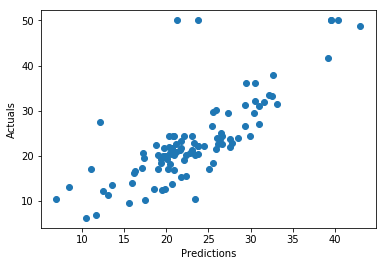

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter ( y_pred, y_test)
plt.xlabel  ("Predictions")
plt.ylabel  ("Actuals" )

If the prediction were 100% correct, we would get a perfect 45<sup>0</sup> line. Let's draw that as a baseline to compare the prediction's performance. 


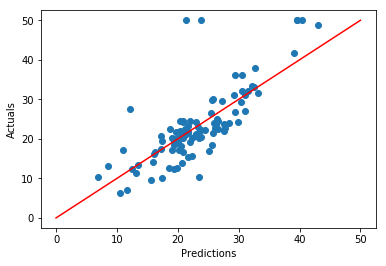

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter ( y_pred, y_test)
plt.xlabel  ("Predictions")
plt.ylabel  ("Actuals" )

x = [0,50]
y = [0,50]

plt.plot(x,y,color="r")

That's not a bad fit. Let's calculate the r<sup>2</sup> to have a numeric estimate of how good of a fit we have. 

In [75]:
model.score(X_test,y_test)

0.6137837209650663

That's an **r<sup>2</sup>** of *0.613*. So, we can say that we are **61% accurate** in our prediction. 

## Polynomial Regression

So far, we have seen examples of **Linear Regression** ( both simple and multi). However, not all types of data can be fit into a Linear Regression. For example, population growth is a good example of a non-linear data. Probably a better word for it is **exponential** growth. Let's take a simple example - The population of India and how it is projected to grow in this century. ( This is real data taken from United Nations at https://population.un.org/wpp/Download/Standard/Population/ )

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

india = pd.read_csv("../data/india_population.csv")
india.head()

,year,population
0,1950,376325200
1,1951,382245303
2,1952,388538620
3,1953,395160091
4,1954,402077026


Let's plot this 150 years of data ( since 1950 until 2015 and projected data until 2100)

Text(0, 0.5, 'Population - in Billions')

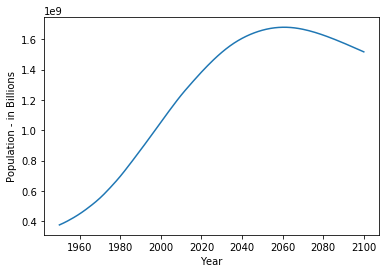

In [49]:
plt.plot(india["year"],india["population"])
plt.xlabel("Year")
plt.ylabel("Population - in Billions")

Can you imagine trying to fit this data using Linear Regression ? Well, it is going to be a huge approximation after - say 2040 where the linearity ends. Let's try it to see how well it fits. 

In [244]:
from sklearn.linear_model import LinearRegression

model   = LinearRegression().fit(india[["year"]],india["population"])

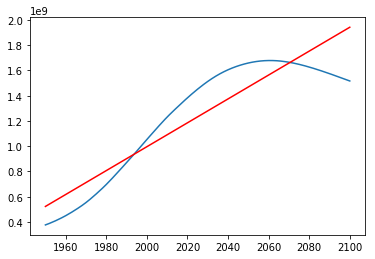

In [53]:
# step 2
slope       = model.coef_
intercept   = model.intercept_

point_1 = slope*1950 + intercept
point_2 = slope*2100 + intercept

# step 3
plt.plot(india["year"],india["population"])
plt.plot([1950,2100], [point_1,point_2],color="r")

Well, it does an OK job given that the model is linear, but can we account for the curve somehow ? 

This is exactly where **polynomials** come in. sklearn has built-in methods for this - **PolynomialFeature** . Let's use it to fit the data. 

In [214]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly_2   = PolynomialFeatures(degree=2)
poly_2_X = poly_2.fit_transform(india[["year"]])

In [215]:
np.set_printoptions(precision=3, suppress=True, linewidth=150)
print ( poly_2_X[0:5,:] )

[[      1.    1950. 3802500.]
 [      1.    1951. 3806401.]
 [      1.    1952. 3810304.]
 [      1.    1953. 3814209.]
 [      1.    1954. 3818116.]]


What is really happening here ? A single column ( year ) has now become 3 columns.

<img src="./pics/poly_fit.png"/>

The original linear equation <br> $y = a x_1 + b$ <br> has been transformed to <br> $y = 1 + a_1 x_1 + a_2 x_1^2 + b$

Nothing has been predicted yet - we have just transformed the predictors. Now, let's try to fit the new predictors to the response variable. 

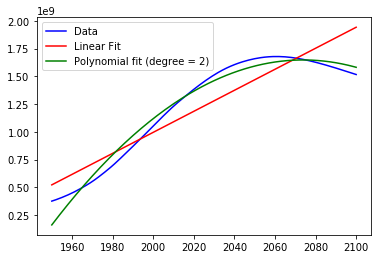

In [216]:
model_linear   = LinearRegression().fit(india[["year"]],india["population"])
model_2_poly   = LinearRegression().fit(poly_2_X,india["population"])

data,       = plt.plot(india["year"], india["population"], color="blue", label="data")
linear_fit, = plt.plot(india["year"], model_linear.predict(india[["year"]]), color = 'red', label="linear fit")
poly_2_fit,   = plt.plot(india["year"], model_2_poly.predict(poly_2_X), color = 'green', label="polynomial fit")

plt.legend((data, linear_fit, poly_2_fit), ('Data', 'Linear Fit', 'Polynomial fit (degree = 2)'))



Visually, you can see the green line (polynomial fit) seems to follow the blue line(data) much better than the red line(linear fit), right ? How about we go one step further and see if increasing the polynomial degree would make this any better. 

In [217]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly_3   = PolynomialFeatures(degree=3)
poly_3_X = poly_3.fit_transform(india[["year"]])

In [213]:
np.set_printoptions(precision=3, suppress=True, linewidth=150)
print ( poly_3_X[0:5,:] )

[[1.000e+00 1.950e+03 3.802e+06 7.415e+09]
 [1.000e+00 1.951e+03 3.806e+06 7.426e+09]
 [1.000e+00 1.952e+03 3.810e+06 7.438e+09]
 [1.000e+00 1.953e+03 3.814e+06 7.449e+09]
 [1.000e+00 1.954e+03 3.818e+06 7.461e+09]]


Essentiall, we are doing this now. 

The original linear equation <br> $y = a x_1 + b$ <br> has been transformed to <br> $y = 1 + a_1 x_1 + a_2 x_1^2 + a_3 x_1^3 + b$

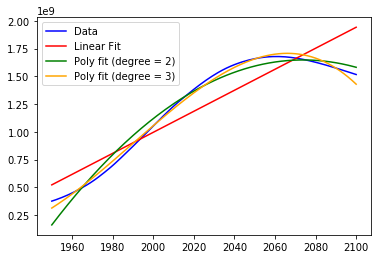

In [219]:
model_3_poly   = LinearRegression().fit(poly_3_X,india["population"])

data,         = plt.plot(india["year"], india["population"], color="blue")
linear_fit,   = plt.plot(india["year"], model_linear.predict(india[["year"]]), color = 'red')
poly_2_fit,   = plt.plot(india["year"], model_2_poly.predict(poly_2_X), color = 'green')
poly_3_fit,   = plt.plot(india["year"], model_3_poly.predict(poly_3_X), color = 'orange')

plt.legend((data, linear_fit, poly_2_fit, poly_3_fit), ('Data', 'Linear Fit', 
                                                        'Poly fit (degree = 2)', 'Poly fit (degree = 3)'))

The orange line (polynomial fit, degree = 3) is hugging the actual data curve (blue) much closer than the green line ( polynomial fit , degree = 2 ), right ? Let's do the numbers ( r<sup>2</sup> score ) as well, to really know the degree of fit. 

In [247]:
r2_linear = model.score(india[["year"]],india[["population"]])
r2_poly_2 = model_2_poly.score(poly_2_X,india[["population"]])
r2_poly_3 = model_3_poly.score(poly_3_X,india[["population"]])

print ( r2_linear, " --> R squared - Linear fit")
print ( r2_poly_2, " --> R squared - polynomial fit ( degree = 2)")
print ( r2_poly_3, " --> R squared - polynomial fit ( degree = 3)")

0.8434443860759384  --> R squared - Linear fit
0.9776830799010624  --> R squared - polynomial fit ( degree = 2)
0.9953977657287687  --> R squared - polynomial fit ( degree = 3)


### Challenges

#### Challenge 1

Use polynomial regression to fit the following parameters on the boston Housing dataset. 
- LSTAT ( Lower Status Population percentage )
- MEDV  ( Median house value )

After modeling , 
- Plot both linear and polynomial model ( degree = 2 ) to visually show how they perform
- Compare the r<sup>2</sup>  values between linear and polynomial model
- Verify if increasing the degree of the polynomial regression ( say degree = 3 or 4 ) increases the performance. 

### Solution

In [73]:
from sklearn.datasets import load_boston
boston = load_boston()

Text(0, 0.5, 'MEDV  - Median house price')

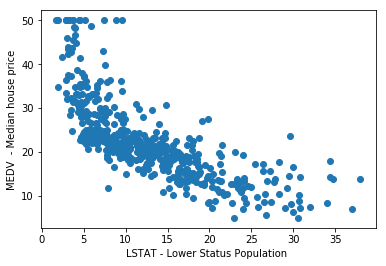

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(boston.data[:,12],boston.target)
plt.xlabel("LSTAT - Lower Status Population ")
plt.ylabel("MEDV  - Median house price")

Let's first try to fit this data with a linear regression model. 

In [12]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_linear   = LinearRegression().fit(boston.data[:,12].reshape(-1,1),boston.target)

Text(0, 0.5, 'MEDV  - Median house price')

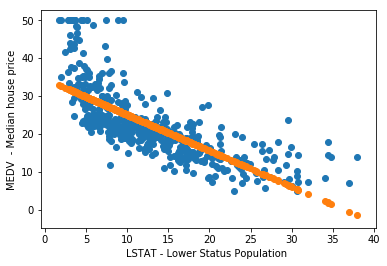

In [85]:
plt.scatter(boston.data[:,12],boston.target)
plt.scatter(boston.data[:,12],model_linear.predict(boston.data[:,12].reshape(-1,1)))
plt.xlabel("LSTAT - Lower Status Population ")
plt.ylabel("MEDV  - Median house price")

This dataset doesn't look all that linear right ? Let's see how our r<sup>2</sup> score compares. 

In [87]:
model_linear.score(boston.data[:,12].reshape(-1,1),boston.target)

0.5441462975864797

That's a 54% fit. Now, let's try a polynomial fit - say second degree. 

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Transform linear to polnomial features
poly_2   = PolynomialFeatures(degree=2)
poly_2_X = poly_2.fit_transform(boston.data[:,12].reshape(-1,1))

model_2_poly   = LinearRegression().fit(poly_2_X,boston.target)

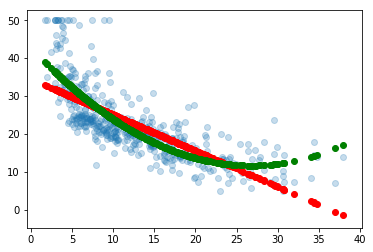

In [22]:
# Plot the actual data along with the fit
plt.scatter(boston.data[:,12],boston.target,alpha=0.25)

linear_fit    = plt.scatter(boston.data[:,12], model_linear.predict(boston.data[:,12].reshape(-1,1)), color = 'red')
poly_2_fit    = plt.scatter(boston.data[:,12], model_2_poly.predict(poly_2_X), color = 'green')


In [102]:
model_2_poly.score(poly_2_X,boston.target)

0.6407168971636612

**0.544** - r<sup>2</sup> score with linear modeling<br>
**0.640** - r<sup>2</sup> score with polynomial modeling

That seems to be some improvement, right ? 

In [104]:
from sklearn.preprocessing import PolynomialFeatures

# Transform linear to polnomial features
poly_3   = PolynomialFeatures(degree=3)
poly_3_X = poly_3.fit_transform(boston.data[:,12].reshape(-1,1))

model_3_poly   = LinearRegression().fit(poly_3_X,boston.target)

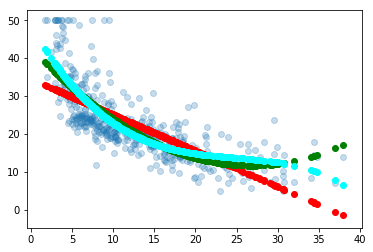

In [105]:
# Plot the actual data along with the fit
plt.scatter(boston.data[:,12],boston.target,alpha=0.25)

linear_fit   = plt.scatter(boston.data[:,12], model_linear.predict(boston.data[:,12].reshape(-1,1)), color = 'red')
poly_2_fit   = plt.scatter(boston.data[:,12], model_2_poly.predict(poly_2_X), color = 'green')
poly_3_fit   = plt.scatter(boston.data[:,12], model_3_poly.predict(poly_3_X), color = 'cyan')


In [106]:
model_3_poly.score(poly_3_X,boston.target)

0.6578476405895719

**0.544** - r2 score with linear modeling <br>
**0.640** - r2 score with polynomial modeling ( degree = 2 ) <br>
**0.657** - r2 score with polynomial modeling ( degree = 3 )

That's just a marginal improvement over second degree polynomial regression. So, you don't need to go beyond second degree.

How about a 10th degree fit ? 

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# Transform linear to polnomial features
poly_10   = PolynomialFeatures(degree=10)
poly_10_X = poly_10.fit_transform(boston.data[:,12].reshape(-1,1))

model_10_poly   = LinearRegression().fit(poly_10_X,boston.target)

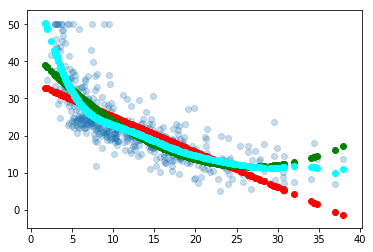

In [24]:
# Plot the actual data along with the fit
plt.scatter(boston.data[:,12],boston.target,alpha=0.25)

linear_fit    = plt.scatter(boston.data[:,12], model_linear.predict(boston.data[:,12].reshape(-1,1)), color = 'red')
poly_2_fit    = plt.scatter(boston.data[:,12], model_2_poly.predict(poly_2_X), color = 'green')
poly_10_fit   = plt.scatter(boston.data[:,12], model_10_poly.predict(poly_10_X), color = 'cyan')


In [25]:
model_10_poly.score(poly_10_X,boston.target)

0.6844527059749335

**0.544** - r2 score with linear modeling <br>
**0.640** - r2 score with polynomial modeling ( degree = 2 ) <br>
**0.657** - r2 score with polynomial modeling ( degree = 3 ) <br>
**0.684** - r2 score with polynomial modeling ( degree = 10 ) <br>

See, even if you go to a 10th degree polynomial fitting, the improvement in r<sup>2</sup> is just about 0.04 from a second degree polynomial fitting. 

## Overfitting

Sometimes, where there is not enough data, the model might tend to overfit. Look at the example data below. We are simulating a sin wave.

In [19]:
import numpy as np
import math

x = np.linspace(10,100,num=20)
y = np.sin(x*math.pi/180)

Let's plot it to see how it it looks 

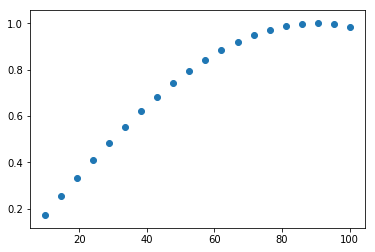

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y)

Let's introduce a bit of variance to make the data a bit realistic. 

In [21]:
variance = np.random.rand(20) / 2

y = y + variance

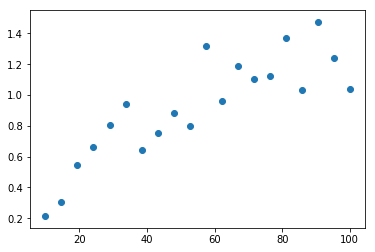

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y)

Now,  let's see how a 2nd degree polynomial regression fits. 

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Transform linear to polnomial features
poly_2   = PolynomialFeatures(degree=2)
poly_2_X = poly_2.fit_transform(x.reshape(-1,1))

model_2_poly   = LinearRegression().fit(poly_2_X,y)

Text(0.5, 1.0, 'Good fit')

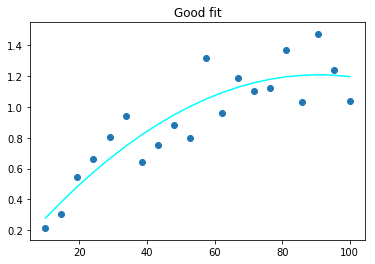

In [49]:
# Plot the actual data along with the fit
plt.scatter(x,y)

# linear_fit    = plt.scatter(boston.data[:,12], model_linear.predict(boston.data[:,12].reshape(-1,1)), color = 'red')
poly_2_fit   = plt.plot(x, model_2_poly.predict(poly_2_X), color = 'cyan')
plt.title("Good fit")

This looks to be a good fit, right ? Now, let's try a higher order polynomial fit ( say degree = 10 )

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Transform linear to polnomial features
poly_10   = PolynomialFeatures(degree=15)
poly_10_X = poly_10.fit_transform(x.reshape(-1,1))

model_10_poly   = LinearRegression().fit(poly_10_X,y)

Text(0.5, 1.0, 'Over fit')

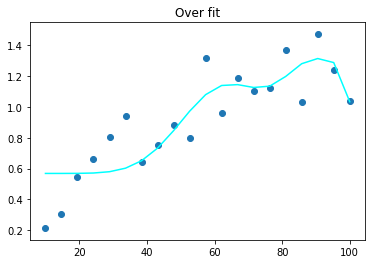

In [46]:
# Plot the actual data along with the fit
plt.scatter(x,y)

# linear_fit    = plt.scatter(boston.data[:,12], model_linear.predict(boston.data[:,12].reshape(-1,1)), color = 'red')
# poly_2_fit    = plt.scatter(boston.data[:,12], model_2_poly.predict(poly_2_X), color = 'green')
poly_10_fit   = plt.plot(x, model_10_poly.predict(poly_10_X), color = 'cyan')
plt.title("Over fit")

Let's put these two figures together to compare. 

<img src="./pics/poly_2.png"/> <img src="./pics/poly_15.png"/>

Overfitting typically happens when the model is trying to work too hard for the data. And why is it a problem ? Overfitting tries to fit the data too much and hence will not work well for new datasets. Think of overfitting as localizing the solution for the test datasets - it is more or less **memorizing** the data, not **generalizing** a solution for the dataset. Obviously, it will not work as well when model is used on real data set. We will see more examples of these when we see other machine learning algorithms down the line. 

If you are wondering why the simple linear regression is able to learn the model just enough, but the higher degree polynomial regression is over learning it, that is because the higher order polynomial regression has the flexibility to learn more ( as compared to a linear or second order polynomial regression ). This is actually, good, except that it is not able to discern noise from data. Let's increase the dataset size to see if the same 15 degree polynomial regression peforms better than a second order. 

**Increase sample size to 1000**

<img src="./pics/more-data-good-fit.png"/><img src="./pics/more-data-over-fit.png"/>

You see, data size did not matter, still the 15th order polynomial regression still overfits the data. The reason is that for the amount of data and noise, a second or 3rd degree polynomial has enough power to capture the complexity of this data. Probably for more complicated data sets, an increase in degree might capture the complexity better. 

### Detect Overfitting

If you look at the pictures above, we were able to clearly see an overfit. This is because it is a 2 dimensional dataset. Most data is multi-dimensional in real life - in which case we cannot be able to identify an overfit, but just looking at a plot. There are basically 2 methods to identify an overfit. 

#### 1. Chose a simpler model.

Look at a measure of the score ( **r<sup>2</sup>**) - if there is not a significant difference, then better go for a simpler model. 

In [103]:
import numpy as np
import math

x = np.linspace(10,100,num=1000)
y = np.sin(x*math.pi/180)

variance = np.random.rand(1000) / 2
y = y + variance

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 2nd Degree polynomial fit
poly_2   = PolynomialFeatures(degree=2)
poly_2_X = poly_2.fit_transform(x.reshape(-1,1))
model_2_poly   = LinearRegression().fit(poly_2_X,y)

# 15th degree polynomial fit
poly_10   = PolynomialFeatures(degree=15)
poly_10_X = poly_10.fit_transform(x.reshape(-1,1))

model_10_poly   = LinearRegression().fit(poly_10_X,y)

In [104]:
print ( model_2_poly.score(poly_2_X,y) )
print ( model_10_poly.score(poly_10_X,y) )

0.7528533863184099
0.688988255588203


<table>
  <tr>
      <th>r<sup>2</sup> score (Train)</th>   <th>2<sup>nd</sup> Degree Polynomial</th>    <th>15<sup>th</sup> Degree Polynomial</th>   
  </tr>
    <tr> <td> </td> <td>0.759</td>     <td>0.688</td>     
  </tr>

</table>

The **r<sup>2</sup>** score of the 2<sup>nd</sup> degree fit is better than the 15<sup>th</sup> degree polynomial model. So, the simpler model ( 2<sup>nd</sup> degree model) wins. 

#### 2. Check the model performance across Training and Test datasets. 

Another method to identify an overfit is by validating how well the model is performing against the training dataset vs the test dataset. 

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print ( "X_train size", X_train.shape)
print ( "X_test size", X_test.shape)
print ( "y_train size", y_train.shape)
print ( "y_train size", y_test.shape)

print ( "ratio = ", X_test.shape[0]/x.shape[0])


X_train size (800,)
X_test size (200,)
y_train size (800,)
y_train size (200,)
ratio =  0.2


Fit a 2nd degree polynomial regression

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Transform linear to polnomial features
poly_2   = PolynomialFeatures(degree=2)
poly_2_X = poly_2.fit_transform(X_train.reshape(-1,1))

model_2_poly   = LinearRegression().fit(poly_2_X,y_train)

Fit a 15th degree polynomial regression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Transform linear to polnomial features
poly_10   = PolynomialFeatures(degree=15)
poly_10_X = poly_10.fit_transform(X_train.reshape(-1,1))

model_10_poly   = LinearRegression().fit(poly_10_X,y_train)

Compare the r<sup>2</sup> scores across both the scenarios for training data set. 

In [89]:
print ( model_2_poly.score(poly_2_X,y_train), " -->r-squared - for 2nd Degree Polynomial regression on training dataset" )

0.7610573708682281  -->r-squared - for 2nd Degree Polynomial regression on training dataset


In [90]:
print ( model_10_poly.score(poly_10_X,y_train),  " -->r-squared - for 2nd Degree Polynomial regression on training dataset" )

0.7072513285815969  -->r-squared - for 2nd Degree Polynomial regression on training dataset


In [76]:
poly_2_X_test  = poly_2.fit_transform(X_test.reshape(-1,1))
poly_10_X_test = poly_10.fit_transform(X_test.reshape(-1,1))

In [105]:
print ( model_2_poly.score(poly_2_X_test,y_test),   " -->r-squared - for 2nd Degree Polynomial regression on Test dataset" )
print ( model_10_poly.score(poly_10_X_test,y_test), " -->r-squared - for 10th Degree Polynomial regression  on Test dataset" )

0.7567099619200097  -->r-squared - for 2nd Degree Polynomial regression on Test dataset
0.6589325042558386  -->r-squared - for 10th Degree Polynomial regression  on Test dataset


As you can see the r-square score has decreased (slightly though ) between training and test datasets. 

**r-square score between training and test datasets**

<table>
  <tr>
      <th>Model</th>   <th>r<sup>2</sup> score (Train)</th>    <th>r<sup>2</sup> score (Test)</th>
  </tr>
  <tr>
      <td>2<sup>nd</sup> Degree</td>    <td>0.761</td>     <td>0.757</td>
  </tr>
  <tr>
      <td>15<sup>th</sup> Degree</td>    <td>0.707</td>     <td>0.661</td>
  </tr>
</table>

This is actually not a bad fit, given that there is just a slight decrease in how the model fits the training vs test datasets. However, if there is a large difference, you better discard the model.  

### Prevent Overfitting